In [ ]:
!pip install Pillow==9.3.0

In [ ]:
!gdown 1NLPz0fqkPvRKqluROJqMkGO8FpHFhAb1

Downloading...
From: https://drive.google.com/uc?id=1NLPz0fqkPvRKqluROJqMkGO8FpHFhAb1
To: /content/video baki.mp4
100% 2.10M/2.10M [00:00<00:00, 139MB/s]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial
from PIL import Image
import imageio
import IPython
import skimage.io

import cv2
import os

In [ ]:
# colocar el nombre del video aquí!
name = 'video baki.mp4'

In [ ]:
# ejecutar solo una vez
dirname = 'frames'
os.mkdir(dirname)

In [ ]:
!rm -r frames

In [ ]:
intervalo =  5 #@param {type:"slider", min:1, max:100, step:1}
intervalo *= 20 # convertir a 200 milisegundos
vidcap = cv2.VideoCapture(name)
count = 0

if not vidcap.isOpened():
    print("Error: No se pudo abrir el archivo.")
else:
  while True:
    ret, frame = vidcap.read()
    if ret == False:
          break
    cv2.imwrite('./frames/img' + str(count) + '.png', frame)
    vidcap.set(cv2.CAP_PROP_POS_MSEC,(count * intervalo))
    count += 1
vidcap.release()
cv2.destroyAllWindows()

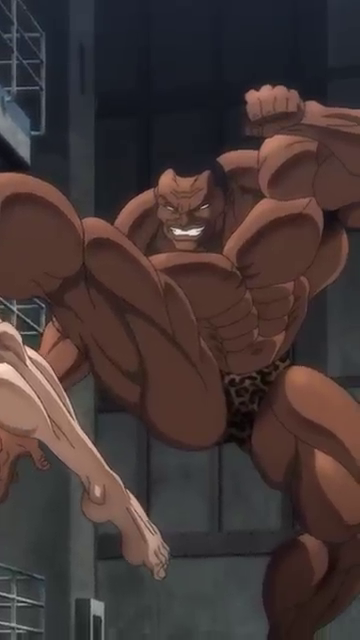

In [ ]:
#@title Mostrar primeras 50 imágenes
i =  48 #@param {type:"slider", min:0, max:50, step:1}
from PIL import Image
Image.open("./frames/img{}.png".format(i))

In [ ]:
import os
import numpy as np

name_img = os.listdir('./frames/')
list_img = [Image.open(f"./frames/{img}").resize((64, 64)) for img in name_img]
numpy_list_img = [(name, np.array(img)) for name , img in zip(name_img, list_img)]

In [ ]:
# cantidad de imágenes:
len(name_img)

282

In [ ]:
numpy_list_img[0][1].shape

(64, 64, 3)

# Diferencia de píxeles

## Distancia Euclidiana

In [ ]:
from numpy.linalg import norm

#distancia euclidiana entre imágenes

resultados = []
bag = []
for idx, m in enumerate(numpy_list_img):
    if idx+1 < len(numpy_list_img):
        img_1 = numpy_list_img[idx][1]
        img_2 = numpy_list_img[idx+1][1]

        img_1f = img_1.reshape((img_1.shape[0], img_1.shape[1]*3))
        img_2f = img_2.reshape((img_2.shape[0], img_2.shape[1]*3))
        dist = norm(img_1f - img_2f, 1)
        resultados.append(dist)

        if len(bag) > len(numpy_list_img)*0.1:
            ind_temp = None
            dis_temp = dist
            i = 0
            for indice, diff in bag:
                if dis_temp > diff:
                    dis_temp = diff
                    ind_temp = i
                i += 1

            if ind_temp is not None:
                bag.pop(ind_temp)
                bag.append((idx, dist))
        else:
            bag.append((idx, dist))

In [ ]:
len(bag)

29

### Mostrar el histograma

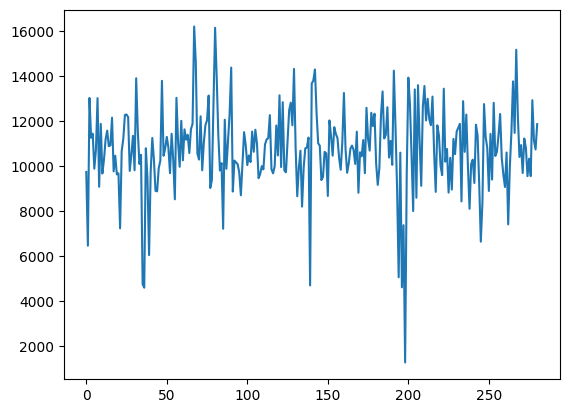

In [ ]:
import matplotlib.pyplot as plt

num_frames = np.arange(0, len(resultados), 1, dtype=int)
plt.plot(num_frames, resultados)
plt.show()

### Generar y Mostrar el GIF

In [ ]:
gif_images = [Image.open(f"./frames/img{index}.png") for index, _ in bag]

In [ ]:
gif_images_np = [np.array(imagen) for imagen in gif_images]

In [ ]:
imageio.mimsave('resumen.gif', gif_images)

In [ ]:
IPython.display.Image('resumen.gif', format='png', width=550)

Output hidden; open in https://colab.research.google.com to view.

## Distancia de Manhattan:

In [ ]:
# Probar con:
manhathan = lambda a, b : np.sum(np.abs(a-b))

In [ ]:
from numpy.linalg import norm

#distancia manhattan entre imágenes

resultados = []
bag = []
for idx, m in enumerate(numpy_list_img):
    if idx+1 < len(numpy_list_img):
        img_1 = numpy_list_img[idx][1]
        img_2 = numpy_list_img[idx+1][1]

        img_1f = img_1.reshape((img_1.shape[0], img_1.shape[1]*3))
        img_2f = img_2.reshape((img_2.shape[0], img_2.shape[1]*3))
        dist = manhathan(img_1f, img_2f)
        resultados.append(dist)

        if len(bag) > len(numpy_list_img)*0.1:
            ind_temp = None
            dis_temp = dist
            i = 0
            for indice, diff in bag:
                if dis_temp > diff:
                    dis_temp = diff
                    ind_temp = i
                i += 1

            if ind_temp is not None:
                bag.pop(ind_temp)
                bag.append((idx, dist))
        else:
            bag.append((idx, dist))

In [ ]:
len(bag)

29

### Mostrar el histograma

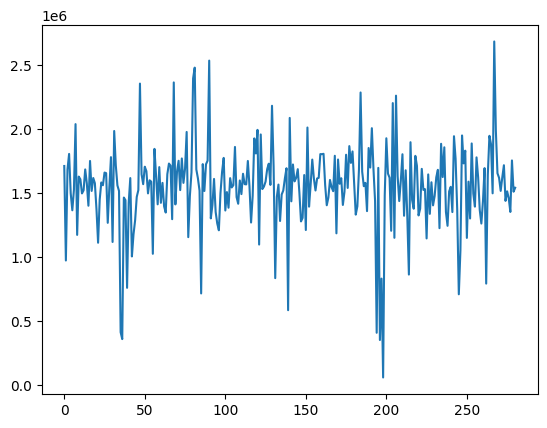

In [ ]:
import matplotlib.pyplot as plt

num_frames = np.arange(0, len(resultados), 1, dtype=int)
plt.plot(num_frames, resultados)
plt.show()

### Generar y Mostrar el GIF

In [ ]:
gif_images = [Image.open(f"./frames/img{index}.png") for index, _ in bag]

In [ ]:
gif_images_np = [np.array(imagen) for imagen in gif_images]

In [ ]:
imageio.mimsave('resumen.gif', gif_images)

In [ ]:
IPython.display.Image('resumen.gif', format='png', width=550)

Output hidden; open in https://colab.research.google.com to view.

# Diferencia de Histogramas

## Distancia Euclidiana

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

def get_hist(name_img):
    #Calculamos el histograma para la imagen seleccionada
    queryImage = cv2.imread(name_img)
    queryImage = cv2.cvtColor(queryImage,cv2.COLOR_BGR2RGB)
    queryHist = cv2.calcHist([queryImage],[0,1],None,[8,8],[0,128,0,256])
    descQuery = queryHist.flatten()
    descQuery = descQuery/(queryImage.shape[0]*queryImage.shape[1])
    return descQuery

distances = []
bag_2 = []
for idx, name in enumerate(name_img):
    if idx+1 < len(numpy_list_img):
        hist1 = get_hist(f"./frames/{name_img[idx]}")
        hist2 = get_hist(f"./frames/{name_img[idx+1]}")
        dist = np.linalg.norm(hist1 - hist2)
        distances.append(dist)
        if len(bag_2) > len(numpy_list_img)*0.1:
            ind_temp = None
            dis_temp = dist
            i = 0
            for indice, diff in bag_2:
                if dis_temp > diff:
                    dis_temp = diff
                    ind_temp = i
                i += 1

            if ind_temp is not None:
                bag_2.pop(ind_temp)
                bag_2.append((idx, dist))
        else:
            bag_2.append((idx, dist))

In [ ]:
len(bag_2)

29

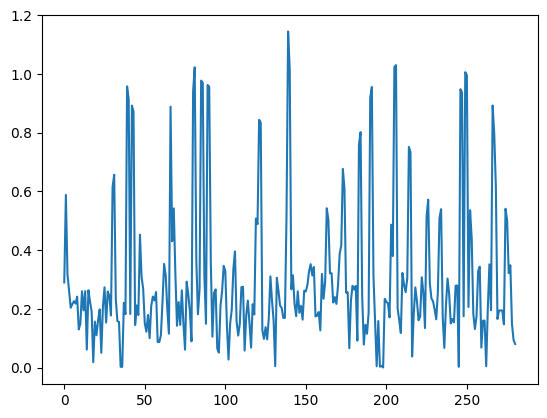

In [ ]:
import matplotlib.pyplot as plt

num_frames = np.arange(0, len(distances), 1, dtype=int)
plt.plot(num_frames, distances)
plt.show()

In [ ]:
gif_images2 = [Image.open(f"./frames/img{index}.png") for index, _ in bag_2]

In [ ]:
gif_images_np2 = [np.array(imagen) for imagen in gif_images2]

In [ ]:
imageio.mimsave('resumen2.gif', gif_images2)

In [ ]:
IPython.display.Image('resumen2.gif', format='png', width=550)

Output hidden; open in https://colab.research.google.com to view.

## Distancia Manhattan

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

def get_hist(name_img):
    #Calculamos el histograma para la imagen seleccionada
    queryImage = cv2.imread(name_img)
    queryImage = cv2.cvtColor(queryImage,cv2.COLOR_BGR2RGB)
    queryHist = cv2.calcHist([queryImage],[0,1],None,[8,8],[0,128,0,256])
    descQuery = queryHist.flatten()
    descQuery = descQuery/(queryImage.shape[0]*queryImage.shape[1])
    return descQuery

distances = []
bag_2 = []
for idx, name in enumerate(name_img):
    if idx+1 < len(numpy_list_img):
        hist1 = get_hist(f"./frames/{name_img[idx]}")
        hist2 = get_hist(f"./frames/{name_img[idx+1]}")
        dist = manhathan(hist1, hist2)
        distances.append(dist)
        if len(bag_2) > len(numpy_list_img)*0.1:
            ind_temp = None
            dis_temp = dist
            i = 0
            for indice, diff in bag_2:
                if dis_temp > diff:
                    dis_temp = diff
                    ind_temp = i
                i += 1

            if ind_temp is not None:
                bag_2.pop(ind_temp)
                bag_2.append((idx, dist))
        else:
            bag_2.append((idx, dist))

In [ ]:
len(bag_2)

29

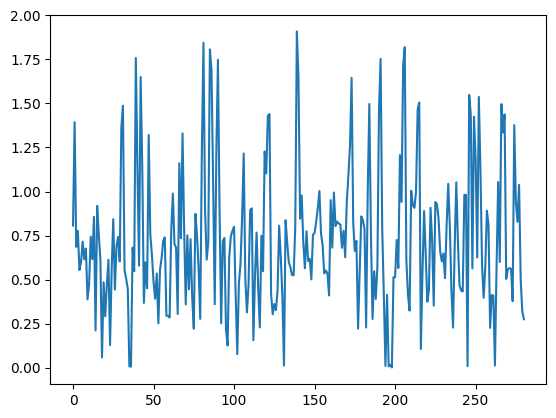

In [ ]:
import matplotlib.pyplot as plt

num_frames = np.arange(0, len(distances), 1, dtype=int)
plt.plot(num_frames, distances)
plt.show()

In [ ]:
gif_images2 = [Image.open(f"./frames/img{index}.png") for index, _ in bag_2]

In [ ]:
gif_images_np2 = [np.array(imagen) for imagen in gif_images2]

In [ ]:
imageio.mimsave('resumen2.gif', gif_images2)

In [ ]:
IPython.display.Image('resumen2.gif', format='png', width=550)

Output hidden; open in https://colab.research.google.com to view.